In [182]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [183]:
df_tracks = pd.read_csv('track.csv')
df_tracks.head()

,No,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.715,87.917,4,acoustic
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.267,77.489,4,acoustic
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.120,76.332,4,acoustic
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.143,181.740,3,acoustic
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.167,119.949,4,acoustic


In [184]:
#checking for null values
pd.isnull(df_tracks).sum()

No                  0
track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64

In [185]:
#Removing null values from the dataset
df_tracks.dropna(inplace=True)

In [186]:
df_tracks.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113999 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   No                113999 non-null  int64  
 1   track_id          113999 non-null  object 
 2   artists           113999 non-null  object 
 3   album_name        113999 non-null  object 
 4   track_name        113999 non-null  object 
 5   popularity        113999 non-null  int64  
 6   duration_ms       113999 non-null  int64  
 7   explicit          113999 non-null  bool   
 8   danceability      113999 non-null  float64
 9   energy            113999 non-null  float64
 10  key               113999 non-null  int64  
 11  loudness          113999 non-null  float64
 12  mode              113999 non-null  int64  
 13  speechiness       113999 non-null  float64
 14  acousticness      113999 non-null  float64
 15  instrumentalness  113999 non-null  float64
 16  liveness          11

In [187]:
#Removing duplicate track_name values
df_tracks = df_tracks.drop_duplicates('track_name')

In [188]:
# Dropping useless columns
df_tracks.drop('No',axis = 1, inplace = True)
df_tracks

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113994,4WbOUe6T0sozC7z5ZJgiAA,Lucas Cervetti,Frecuencias Álmicas en 432hz,"Frecuencia Álmica, Pt. 4",22,305454,False,0.331,0.1710,1,-15.668,1,0.0350,0.9200,0.022900,0.0679,0.3270,132.147,3,world-music
113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,5,-16.393,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music
113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,0,-18.318,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music
113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,0,-10.895,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music


In [189]:
#Finding least popular songs
sorted_df = df_tracks.sort_values('popularity',ascending = True).head(10)
sorted_df

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
59396,2FC9lpKcJHPSueHEz6XEIS,Alireza Mashayekhi;Farimah Ghavamsadri,Left Above the Clouds - Piano Classical Themes...,"Pearls, Op. 118: III. —",0,109532,False,0.279,0.107,4,-22.117,0,0.0424,0.99200,0.919000,0.0740,0.111,107.117,3,iranian
25584,4PaDoGTeE3PPyHPfZ3nqaD,Nu Shooz,80's,I Can't Wait,0,218826,False,0.784,0.844,7,-4.630,0,0.0574,0.16600,0.002010,0.0682,0.940,103.972,4,disco
14890,2cYuiX8Ajtpz3ZsskUkcZP,Pete the Cat;B.o.B;Callie,Upbeat Kids Songs!,Roll Baby Roll,0,121240,False,0.780,0.780,9,-2.783,1,0.0496,0.03200,0.000000,0.1600,0.689,99.963,4,children
5796,7p0g3EkZiRhs8KxV0yWWnY,Meychan,TOKYO - HALLOWEEN -,Obsolete,0,174373,True,0.645,0.933,1,-3.588,1,0.0705,0.00675,0.000001,0.3200,0.761,127.993,4,anime
14917,6KHzcVEKgg7DnlQsCtWcQs,The Countdown Kids,Happy Halloween! (Spooky Favorites for Kids),Thunderstruck,0,296384,False,0.532,0.824,4,-7.288,1,0.0377,0.02070,0.000145,0.2240,0.190,133.050,4,children
14920,286dCk3rJUPD0edTM9BSmj,The Countdown Kids,Happy Halloween! (Spooky Favorites for Kids),We're Going on a Bear Hunt,0,215975,False,0.817,0.627,9,-6.759,0,0.3690,0.50200,0.000000,0.0981,0.452,120.115,4,children
14921,2Tjs7WTSf9Z6wILMHxEZ2U,The Countdown Kids,Happy Halloween! (Spooky Favorites for Kids),"Ghostbusters (From ""Ghostbusters I"")",0,215325,False,0.781,0.971,6,-5.979,1,0.0735,0.04670,0.000000,0.0698,0.647,116.002,4,children
14922,4PCahGkZS0dIvFo0vCQhxB,The Countdown Kids,Happy Halloween! (Spooky Favorites for Kids),Wooly Bully,0,140725,False,0.709,0.828,7,-5.065,1,0.0582,0.13600,0.032800,0.1330,0.806,140.015,4,children
14924,4xpazhql1K71kxWVYyX8ZC,The Countdown Kids,Happy Halloween! (Spooky Favorites for Kids),Love Potion No. 9,0,120222,False,0.725,0.808,4,-9.086,0,0.0317,0.32100,0.000000,0.3040,0.967,129.930,4,children
82199,5X8oinKsFkPHuHvFMPB5MH,The Smithereens,Alternative Christmas 2022,"Rudolph, The Red-Nosed Reindeer",0,184213,False,0.380,0.900,7,-4.233,1,0.0684,0.02260,0.000001,0.3080,0.744,143.481,4,power-pop


In [190]:
df_tracks.describe()

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,73602.000000,7.360200e+04,73602.000000,73602.000000,73602.000000,73602.000000,73602.000000,73602.000000,73602.000000,73602.000000,73602.000000,73602.000000,73602.000000,73602.000000
mean,34.385465,2.321331e+05,0.558678,0.636950,5.283620,-8.604112,0.633760,0.090341,0.331137,0.184390,0.222687,0.467207,122.144035,3.895737
std,19.193180,1.189998e+05,0.178514,0.258693,3.556187,5.319866,0.481779,0.119304,0.339817,0.331416,0.201296,0.264071,30.170034,0.459319
min,0.000000,8.586000e+03,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,21.000000,1.739330e+05,0.445000,0.457000,2.000000,-10.467000,0.000000,0.036200,0.016000,0.000000,0.098700,0.245000,99.161250,4.000000
50%,34.000000,2.158865e+05,0.573000,0.680000,5.000000,-7.266000,1.000000,0.049400,0.194000,0.000085,0.134000,0.455000,122.038500,4.000000
75%,48.000000,2.685790e+05,0.690000,0.859000,8.000000,-5.141000,1.000000,0.088500,0.631000,0.151000,0.288000,0.682000,140.132750,4.000000
max,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


In [191]:
  # Finding top 10 songs with popularity over 90
  df_popularity = df_tracks.query('popularity >90',inplace = False).sort_values('popularity',ascending = False).head(10)
  df_popularity

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
20001,3nqQXoyQOWXiESFLlDF1hG,Sam Smith;Kim Petras,Unholy (feat. Kim Petras),Unholy (feat. Kim Petras),100,156943,False,0.714,0.472,2,-7.375,1,0.0864,0.01300,0.000005,0.2660,0.238,131.121,4,dance
51664,2tTmW7RDtMQtBk7m2rYeSw,Bizarrap;Quevedo,"Quevedo: Bzrp Music Sessions, Vol. 52","Quevedo: Bzrp Music Sessions, Vol. 52",99,198937,False,0.621,0.782,2,-5.548,1,0.0440,0.01250,0.033000,0.2300,0.550,128.033,4,hip-hop
20008,4uUG5RXrOk84mYEfFvj3cK,David Guetta;Bebe Rexha,I'm Good (Blue),I'm Good (Blue),98,175238,True,0.561,0.965,7,-3.673,0,0.0343,0.00383,0.000007,0.3710,0.304,128.040,4,dance
67356,5ww2BF9slyYgNOk37BlC4u,Manuel Turizo,La Bachata,La Bachata,98,162637,False,0.835,0.679,7,-5.329,0,0.0364,0.58300,0.000002,0.2180,0.850,124.980,4,latin
67358,6Sq7ltF9Qa7SNFBsV5Cogx,Bad Bunny;Chencho Corleone,Un Verano Sin Ti,Me Porto Bonito,97,178567,True,0.911,0.712,1,-5.105,0,0.0817,0.09010,0.000027,0.0933,0.425,92.005,4,latin
67359,1IHWl5LamUGEuP4ozKQSXZ,Bad Bunny,Un Verano Sin Ti,Tití Me Preguntó,97,243716,False,0.650,0.715,5,-5.198,0,0.2530,0.09930,0.000291,0.1260,0.187,106.672,4,latin
79000,4h9wh7iOZ0GGn8QVp4RAOB,OneRepublic,I Ain’t Worried (Music From The Motion Picture...,I Ain't Worried,96,148485,False,0.704,0.797,0,-5.927,1,0.0475,0.08260,0.000745,0.0546,0.825,139.994,4,piano
67559,5Eax0qFko2dh7Rl2lYs3bx,Bad Bunny,Un Verano Sin Ti,Efecto,96,213061,False,0.801,0.475,7,-8.797,0,0.0516,0.14100,0.000017,0.0639,0.234,98.047,4,latin
67500,3k3NWokhRRkEPhCzPmV8TW,Bad Bunny;Bomba Estéreo,Un Verano Sin Ti,Ojitos Lindos,95,258298,False,0.647,0.686,3,-5.745,0,0.0413,0.08000,0.000001,0.5280,0.268,79.928,4,latin
67603,6Xom58OOXk2SoU711L2IXO,Bad Bunny,Un Verano Sin Ti,Moscow Mule,94,245939,True,0.804,0.674,5,-5.453,0,0.0333,0.29400,0.000001,0.1150,0.292,99.968,4,latin


In [192]:
#Setting track_id as index
df_tracks.set_index('track_id',inplace = True)

In [193]:
# searching for a inforamtion at a specific row in the dataset
df_tracks.iloc[18]

artists             Boyce Avenue;Bea Miller
album_name           Cover Sessions, Vol. 4
track_name                       Photograph
popularity                               67
duration_ms                          260186
explicit                              False
danceability                          0.717
energy                                 0.32
key                                       3
loudness                             -8.393
mode                                      1
speechiness                          0.0283
acousticness                           0.83
instrumentalness                        0.0
liveness                              0.107
valence                               0.322
tempo                               107.946
time_signature                            4
track_genre                        acoustic
Name: 6CgNoAbFJ4Q4Id4EjtbXlC, dtype: object

In [194]:
#Changing duration_ms to seconds
df_tracks['duration'] = df_tracks['duration_ms'].apply(lambda x: x//1000)
df_tracks.drop('duration_ms',inplace = True,axis = 1)

[Text(0.5, 0, 'popularity'),
 Text(1.5, 0, 'explicit'),
 Text(2.5, 0, 'danceability'),
 Text(3.5, 0, 'energy'),
 Text(4.5, 0, 'loudness'),
 Text(5.5, 0, 'speechiness'),
 Text(6.5, 0, 'acousticness'),
 Text(7.5, 0, 'instrumentalness'),
 Text(8.5, 0, 'liveness'),
 Text(9.5, 0, 'valence'),
 Text(10.5, 0, 'tempo'),
 Text(11.5, 0, 'duration')]

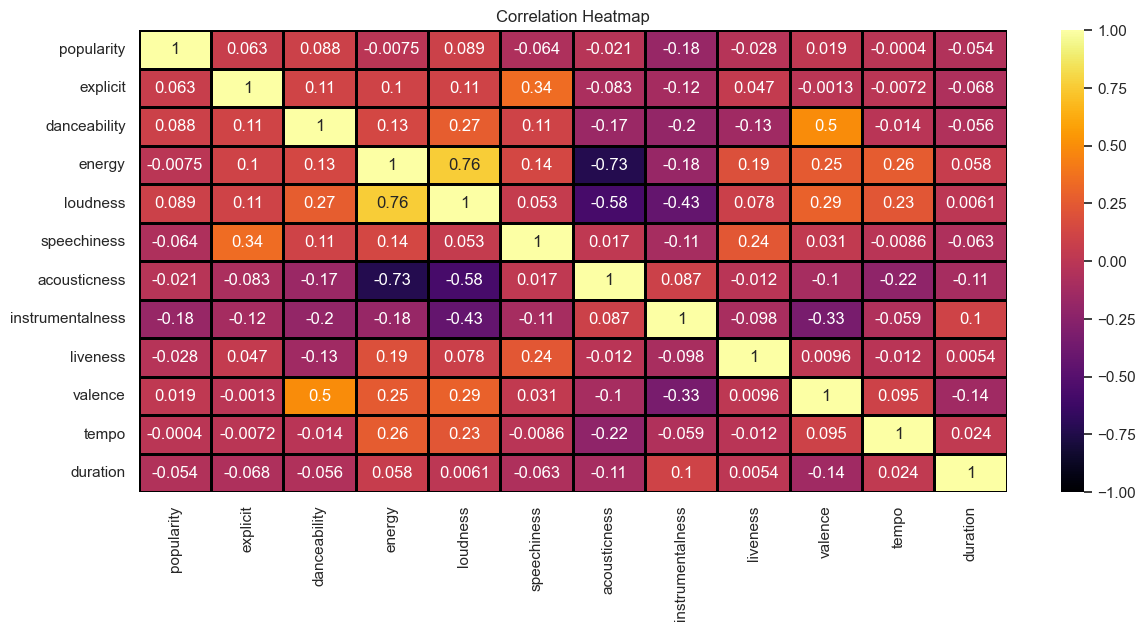

In [195]:
#Creating HeatMap for the correlation between the features using Pearson Correlation
df_com = df_tracks.drop(['artists','album_name','track_name','key','mode','time_signature','track_genre'],axis = 1).corr(method = 'pearson')
plt.figure(figsize=(14,6))
heatmap = sns.heatmap(df_com, annot = True, vmin = -1, vmax = 1, center = 0, cmap = 'inferno',linewidths = 1, linecolor = 'black')
heatmap.set_title('Correlation Heatmap')
heatmap.set_xticklabels(heatmap.get_xticklabels(),rotation = 90)

In [196]:
#For regression we will take a 4% sample of the dataset 
df_sam = df_tracks.sample(int(0.04*len(df_tracks)))
len(df_sam)

2944

[Text(0.5, 1.0, 'Regression plot between Loudness and Energy of the songs')]

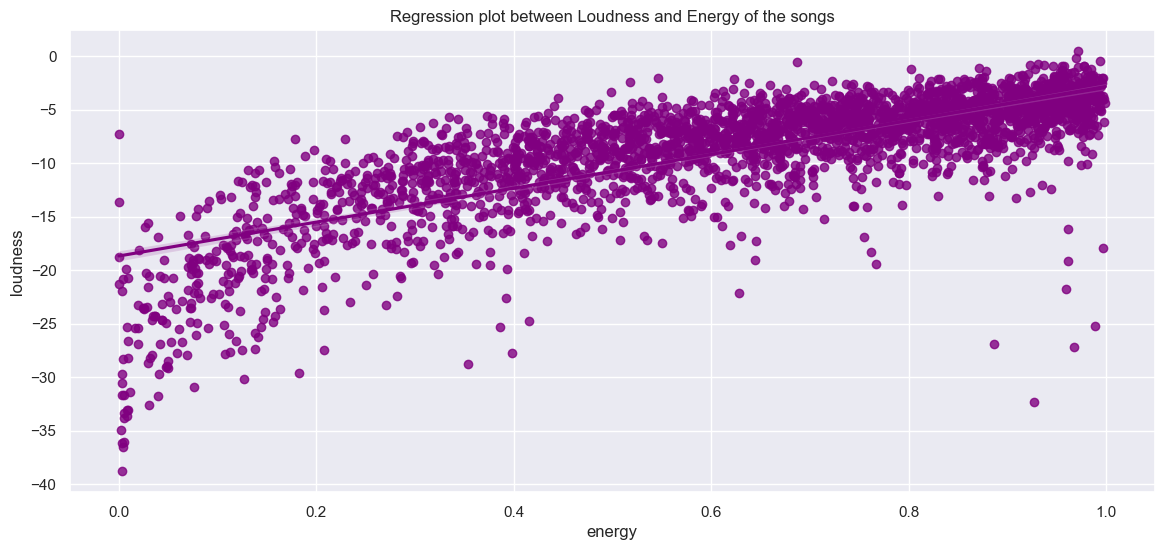

In [197]:
#Regression Plot between Energy and Loudness of the songs
plt.figure(figsize=(14,6))
sns.regplot(data = df_sam, x = 'energy', y = 'loudness',color = 'purple').set(title = 'Regression plot between Loudness and Energy of the songs')

[Text(0.5, 1.0, 'Regression plot between Popularity and Danceability of the songs')]

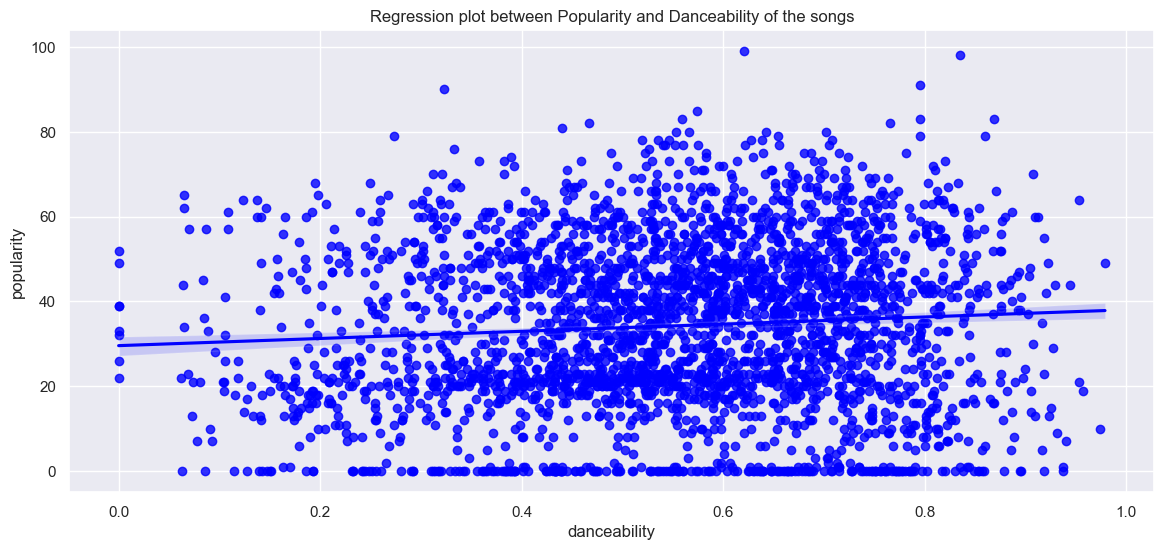

In [212]:
#Regression Plot between Popularity and Acousticness of the songs
plt.figure(figsize=(14,6))
sns.regplot(data = df_sam, x = 'danceability', y = 'popularity',color = 'blue').set(title = 'Regression plot between Popularity and Danceability of the songs')

Text(0, 0.5, 'Genres')

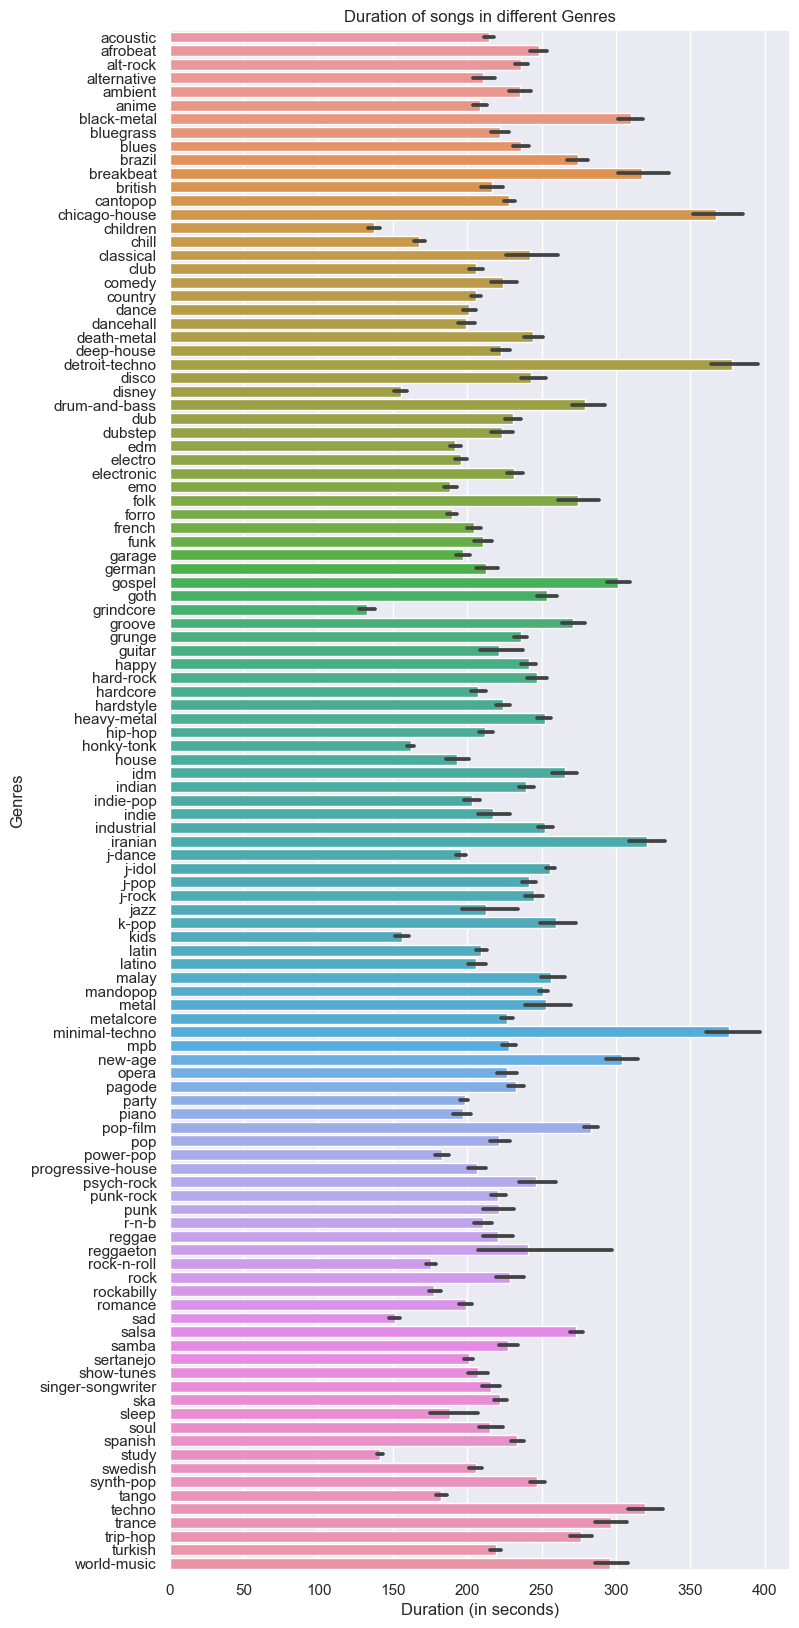

In [201]:
# Relation between Duration and genre of songs
plt.title('Duration of songs in different Genres')
sns.color_palette('rocket', as_cmap=True)
sns.barplot(y='track_genre', x='duration', data=df_tracks)

# Fixing barplot figure size
width = 8
height = 20
sns.set(rc = {'figure.figsize':(width,height)})
plt.xlabel('Duration (in seconds)')
plt.ylabel('Genres')


Text(0, 0.5, 'Genre')

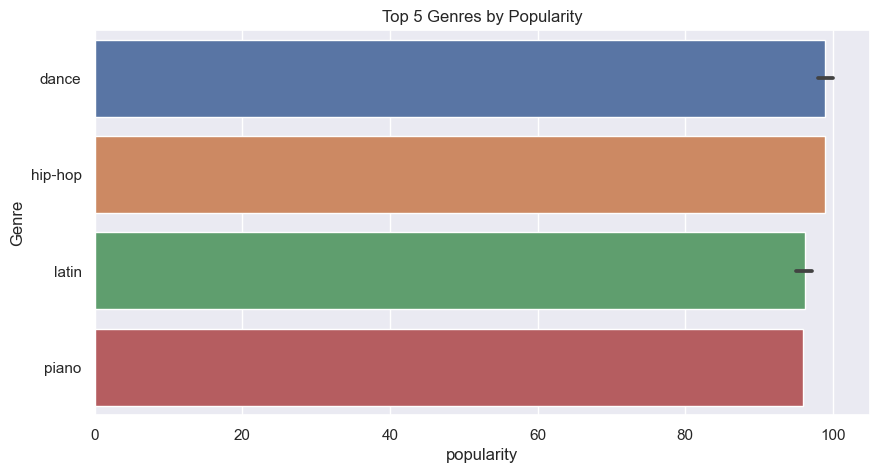

In [213]:
# Top 5 genres by popularity
sns.set_style(style='darkgrid')
plt.figure(figsize=(10,5))
popular = df_tracks.sort_values('popularity', ascending=False).head(10)
sns.barplot(y = 'track_genre', x = 'popularity', data = popular).set(title='Top 5 Genres by Popularity')
plt.ylabel('Genre')